In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
dataset = pd.read_csv("advertising.csv")

In [22]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [23]:
dataset.shape

(200, 4)

Verificam daca exista valori lipsa

In [24]:
dataset.isna().any()

,0
TV,False
Radio,False
Newspaper,False
Sales,False


Verificam daca exista valori duplicat

In [25]:
dataset.duplicated().any()

False

In [26]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Analizam corelatia dintre variabile

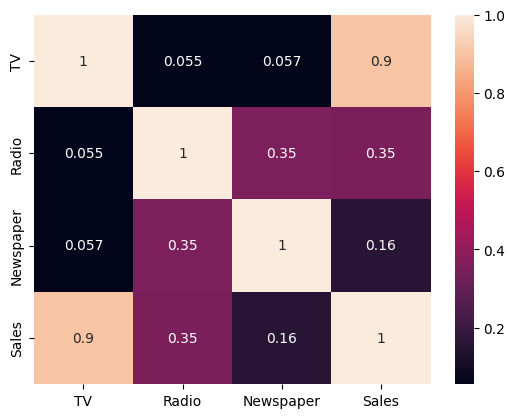

In [27]:
import matplotlib.pyplot as plt

sns.heatmap(dataset.corr(), annot = True)
plt.show()

**1. Regresie lineara simpla**
*   X - coloana TV
*   y - coloana Sales

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Definim vectorii X si y

In [29]:
X = dataset[['TV']]
y = dataset['Sales']

Impartim setul de date

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [31]:
print(X_train.shape)
print(X_test.shape)

(150, 1)
(50, 1)


Crearea modelului LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
a = model.intercept_
print("a = ", a)
b = model.coef_
print("b = ", b)

a =  7.064462691623321
b =  [0.05527482]


Ecuatia de regresie: y = 6.667 + 0.0573 * X

In [35]:
y_pred = model.predict(X_test)

Afisare grafic linia de regresie

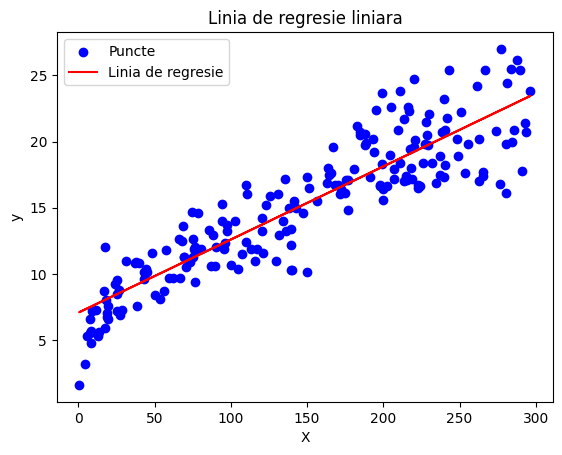

In [36]:
y_estimated = model.predict(X)
plt.scatter(X, y, color='blue', label='Puncte')
plt.plot(X, y_estimated, color='red', label='Linia de regresie')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linia de regresie liniara')
plt.legend()

plt.show()

Determinam functia cost - Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean  Squared Error (RMSE)

In [37]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", mae)

Mean absolute error: 1.482687783495883


In [38]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 3.312449262769639


In [39]:
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)

Root mean squared error: 1.820013533677604


In [40]:
r2 = model.score(X, y) * 100
print("Procent R Squared:", r2)

Procent R Squared: 81.2029091380092


2. Regresie liniara multipla
*   X - coloanele TV, Radio, Newspaper
*   y - coloana Sales


In [41]:
X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
a = model.intercept_
print("a = ", a)

a =  4.4795672428619415


In [46]:
b = model.coef_
print(b)

[0.05485378 0.10421056 0.00328828]


Ecuatia de regresie: y = a + b1X1 + b2X2+ b3X3 = 4.839 + 0.053 * TV + 0.108 * Radion - 0.002 * Newspaper

In [47]:
y_pred = model.predict(X_test)

In [48]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean absolute error: ", mae)

Mean absolute error:  1.365920674288732


In [49]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  3.1285010583342756


In [50]:
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

Root mean squared error:  1.7687569246039083


In [51]:
r2 = model.score(X, y) * 100
print("Procent R Squared:", r2)

Procent R Squared: 90.22711254282538
